In [36]:
cap= 10 #capacitancia 
gC = 19 #conductancia
gNaC = 74 #conductancia de Na
Ep = -67#potencial de equilibrio de membrana
ENap = 60 #potencial de equilibrio de Na
V12 = 1.5 #voltaje medio de apertura del canal de Na
k = 16 #Delta voltaje para apertura del canal de Na

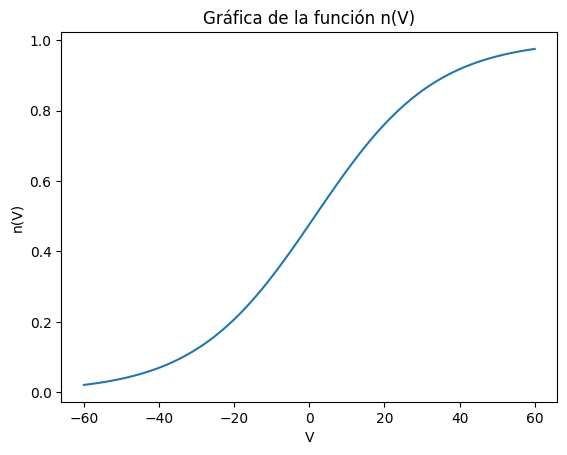

In [37]:
import numpy as np
import matplotlib.pyplot as plt

V = np.linspace(-60, 60, 100)

n = 1 / (1 + np.exp((V12 - V) / k))

plt.plot(V, n)
plt.xlabel('V')
plt.ylabel('n(V)')
plt.title('Gráfica de la función n(V)')
plt.show()

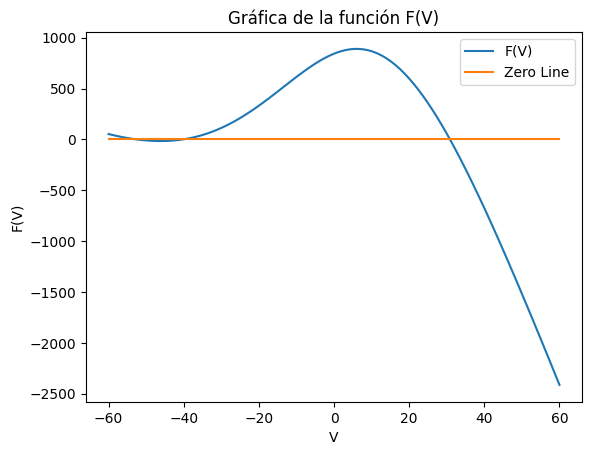

[ 5.31624585e+01  4.24274768e+01  3.24557245e+01  2.32885713e+01
  1.49688369e+01  7.54072427e+00  1.04973202e+00 -4.45745965e+00
 -8.93313133e+00 -1.23286992e+01 -1.45949257e+01 -1.56821705e+01
 -1.55406849e+01 -1.41209546e+01 -1.13740945e+01 -7.25230026e+00
 -1.70935844e+00  5.29877863e+00  1.38133528e+01  2.38720918e+01
  3.55084314e+01  4.87506694e+01  6.36210521e+01  8.01347979e+01
  9.82990634e+01  1.18111861e+02  1.39560937e+02  1.62622633e+02
  1.87260734e+02  2.13425336e+02  2.41051760e+02  2.70059525e+02
  3.00351430e+02  3.31812769e+02  3.64310712e+02  3.97693897e+02
  4.31792265e+02  4.66417169e+02  5.01361799e+02  5.36401937e+02
  5.71297065e+02  6.05791846e+02  6.39617961e+02  6.72496313e+02
  7.04139547e+02  7.34254884e+02  7.62547184e+02  7.88722212e+02
  8.12490010e+02  8.33568321e+02  8.51685960e+02  8.66586071e+02
  8.78029173e+02  8.85795919e+02  8.89689520e+02  8.89537744e+02
  8.85194482e+02  8.76540831e+02  8.63485692e+02  8.45965883e+02
  8.23945786e+02  7.97416

In [25]:
from scipy.optimize import fsolve
import pandas as pd
def FV(I):

    FV = I - gC * (V - Ep) - gNaC * (V - ENap) * n
    return FV

plt.plot(V, FV(0), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(0))

Para I= 0 

Ahora vamos a definir la funcion para solo cambiar los valores para los diferentes I

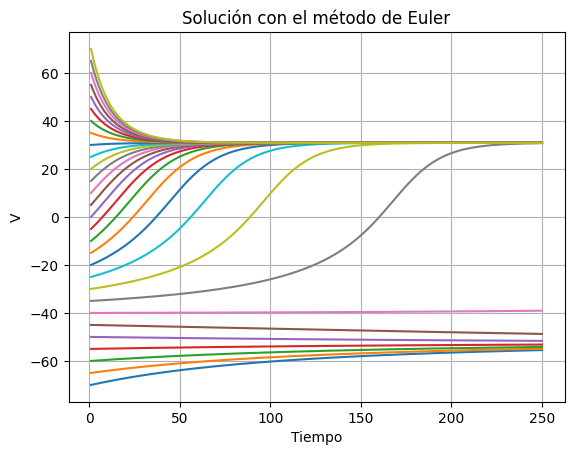

In [26]:
def solve_euler(I):
    h = 0.001  # Tamaño del paso
    T = 250  # Número de pasos
    V0_values = np.arange(-70, 75, 5)
    for V0 in V0_values:
        V_sol = np.zeros(T)
        V_sol[0] = V0

        for cap in range(T - 1):
            n = 1.0 / (1.0 + np.exp((V12 - V_sol[cap]) / k))
            FVcn = I-gC * (V_sol[cap] - Ep) - gNaC * (V_sol[cap] - ENap) * n
            V_sol[cap + 1] = V_sol[cap] + h * FVcn

        plt.plot(np.arange(1, T + 1), V_sol)

    plt.xlabel('Tiempo')
    plt.ylabel('V')
    plt.title('Solución con el método de Euler')
    plt.grid(True)
    plt.show()

solve_euler(0)

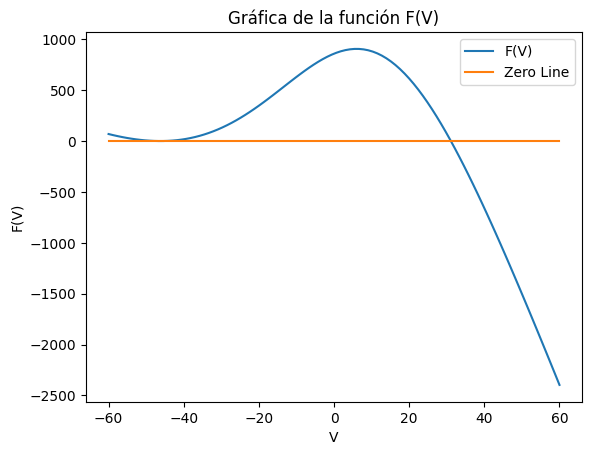

[ 6.91624585e+01  5.84274768e+01  4.84557245e+01  3.92885713e+01
  3.09688369e+01  2.35407243e+01  1.70497320e+01  1.15425403e+01
  7.06686867e+00  3.67130083e+00  1.40507429e+00  3.17829470e-01
  4.59315094e-01  1.87904544e+00  4.62590545e+00  8.74769974e+00
  1.42906416e+01  2.12987786e+01  2.98133528e+01  3.98720918e+01
  5.15084314e+01  6.47506694e+01  7.96210521e+01  9.61347979e+01
  1.14299063e+02  1.34111861e+02  1.55560937e+02  1.78622633e+02
  2.03260734e+02  2.29425336e+02  2.57051760e+02  2.86059525e+02
  3.16351430e+02  3.47812769e+02  3.80310712e+02  4.13693897e+02
  4.47792265e+02  4.82417169e+02  5.17361799e+02  5.52401937e+02
  5.87297065e+02  6.21791846e+02  6.55617961e+02  6.88496313e+02
  7.20139547e+02  7.50254884e+02  7.78547184e+02  8.04722212e+02
  8.28490010e+02  8.49568321e+02  8.67685960e+02  8.82586071e+02
  8.94029173e+02  9.01795919e+02  9.05689520e+02  9.05537744e+02
  9.01194482e+02  8.92540831e+02  8.79485692e+02  8.61965883e+02
  8.39945786e+02  8.13416

In [27]:
#Para I= 16 usamos ambas ecuaciones anteriores
plt.plot(V, FV(16), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(16))

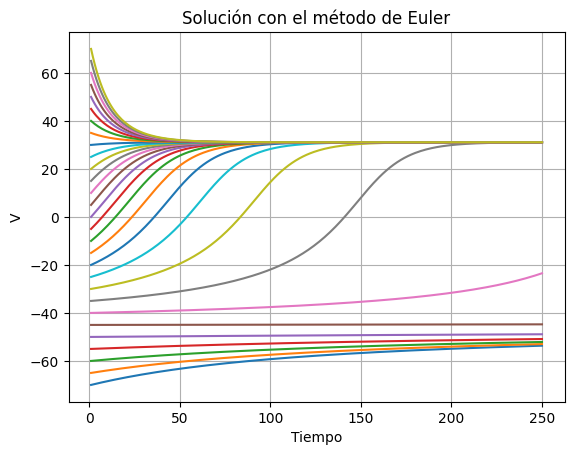

In [28]:
solve_euler(16)

Podemos ver como las soluciones han cambiado

Ahora si I=2

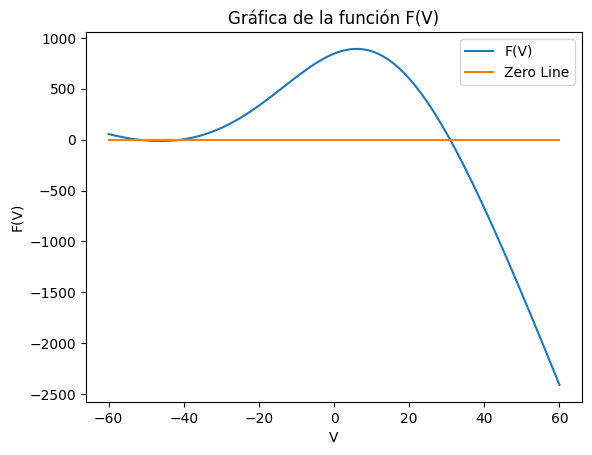

[ 5.51624585e+01  4.44274768e+01  3.44557245e+01  2.52885713e+01
  1.69688369e+01  9.54072427e+00  3.04973202e+00 -2.45745965e+00
 -6.93313133e+00 -1.03286992e+01 -1.25949257e+01 -1.36821705e+01
 -1.35406849e+01 -1.21209546e+01 -9.37409455e+00 -5.25230026e+00
  2.90641557e-01  7.29877863e+00  1.58133528e+01  2.58720918e+01
  3.75084314e+01  5.07506694e+01  6.56210521e+01  8.21347979e+01
  1.00299063e+02  1.20111861e+02  1.41560937e+02  1.64622633e+02
  1.89260734e+02  2.15425336e+02  2.43051760e+02  2.72059525e+02
  3.02351430e+02  3.33812769e+02  3.66310712e+02  3.99693897e+02
  4.33792265e+02  4.68417169e+02  5.03361799e+02  5.38401937e+02
  5.73297065e+02  6.07791846e+02  6.41617961e+02  6.74496313e+02
  7.06139547e+02  7.36254884e+02  7.64547184e+02  7.90722212e+02
  8.14490010e+02  8.35568321e+02  8.53685960e+02  8.68586071e+02
  8.80029173e+02  8.87795919e+02  8.91689520e+02  8.91537744e+02
  8.87194482e+02  8.78540831e+02  8.65485692e+02  8.47965883e+02
  8.25945786e+02  7.99416

In [29]:

plt.plot(V, FV(2), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(2))


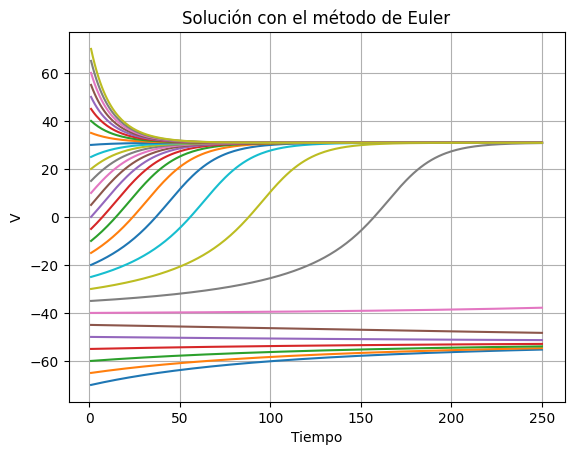

In [30]:
solve_euler(2)

Si I>16

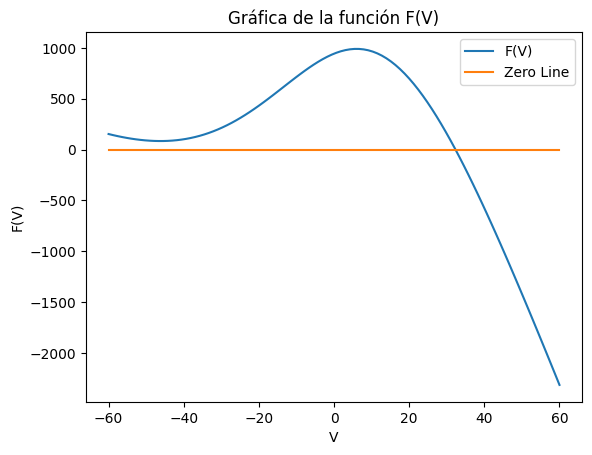

[  153.16245846   142.4274768    132.45572446   123.28857133
   114.96883689   107.54072427   101.04973202    95.54254035
    91.06686867    87.67130083    85.40507429    84.31782947
    84.45931509    85.87904544    88.62590545    92.74769974
    98.29064156   105.29877863   113.81335284   123.87209181
   135.50843139   148.75066937   163.62105209   180.1347979
   198.29906337   218.11186059   239.5609372    262.62263342
   287.26073398   313.42533631   341.05175984   370.0595245
   400.3514299    431.81276899   464.31071195   497.69389702
   531.79226455   566.41716889   601.36179949   636.40193719
   671.29706527   705.79184566   739.6179612    772.49631265
   804.13954748   834.25488425   862.54718449   888.72221203
   912.49001041   933.56832101   951.68596013   966.58607147
   978.02917262   985.79591927   989.68951974   989.53774358
   985.1944818    976.54083136   963.48569243   945.96588251
   923.94578642   897.41657415   866.39502999   830.92204443
   791.06082668   746.8948

In [31]:
plt.plot(V, FV(100), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(100))


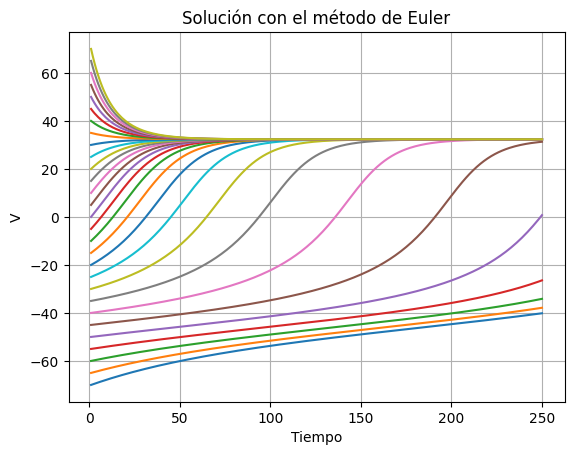

In [32]:
solve_euler(100)

Con I<0 

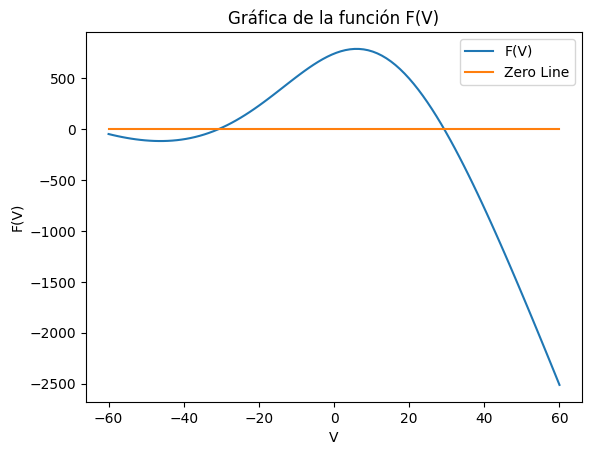

[-4.68375415e+01 -5.75725232e+01 -6.75442755e+01 -7.67114287e+01
 -8.50311631e+01 -9.24592757e+01 -9.89502680e+01 -1.04457460e+02
 -1.08933131e+02 -1.12328699e+02 -1.14594926e+02 -1.15682171e+02
 -1.15540685e+02 -1.14120955e+02 -1.11374095e+02 -1.07252300e+02
 -1.01709358e+02 -9.47012214e+01 -8.61866472e+01 -7.61279082e+01
 -6.44915686e+01 -5.12493306e+01 -3.63789479e+01 -1.98652021e+01
 -1.70093663e+00  1.81118606e+01  3.95609372e+01  6.26226334e+01
  8.72607340e+01  1.13425336e+02  1.41051760e+02  1.70059525e+02
  2.00351430e+02  2.31812769e+02  2.64310712e+02  2.97693897e+02
  3.31792265e+02  3.66417169e+02  4.01361799e+02  4.36401937e+02
  4.71297065e+02  5.05791846e+02  5.39617961e+02  5.72496313e+02
  6.04139547e+02  6.34254884e+02  6.62547184e+02  6.88722212e+02
  7.12490010e+02  7.33568321e+02  7.51685960e+02  7.66586071e+02
  7.78029173e+02  7.85795919e+02  7.89689520e+02  7.89537744e+02
  7.85194482e+02  7.76540831e+02  7.63485692e+02  7.45965883e+02
  7.23945786e+02  6.97416

In [33]:
plt.plot(V, FV(-100), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(-100))

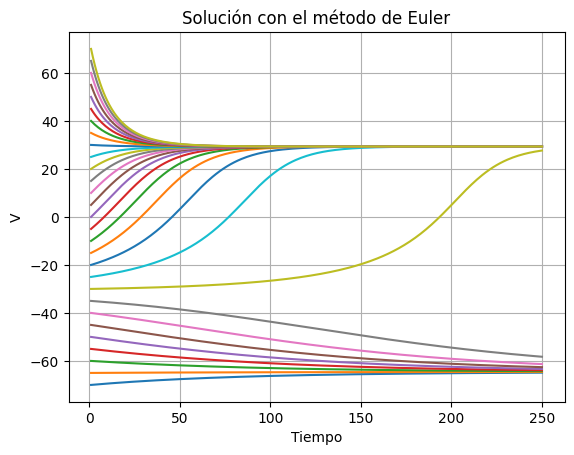

In [34]:
solve_euler(-100)

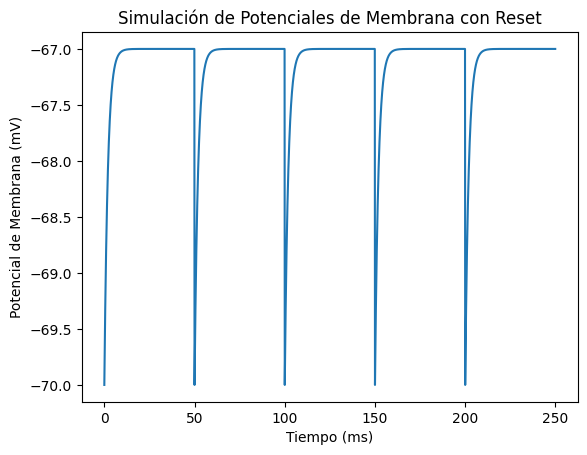

In [35]:
##Hacemos una simulacion para ver si lo podemos graficar
import matplotlib.pyplot as plt

def membrane_potential(I, C, g_leak, E_leak, V_reset, dt, num_steps):
    V = np.zeros(num_steps)  # Arreglo para almacenar los valores del potencial de membrana
    V[0] = E_leak  # Valor inicial del potencial de membrana
    
    for t in range(1, num_steps):
        if V[t-1] >= V_reset:  # Aplicar reset si el potencial alcanza el valor de reset
            V[t] = E_leak
        else:
            dVdt = (I - g_leak * (V[t-1] - E_leak)) / C  # Ecuación del potencial de membrana
            V[t] = V[t-1] + dt * dVdt  # Método de integración numérica de Euler
    
    return V

# Parámetros de la simulación
I = 1.5  # Corriente de entrada
C = 1.0  # Capacitancia de la membrana
g_leak = 0.5  # Conductancia de fuga
E_leak = -70.0  # Potencial de equilibrio de la fuga
V_reset = -50.0  # Valor de reset del potencial de membrana
dt = 0.1  # Tamaño del paso de tiempo
num_steps = 500  # Número de pasos de tiempo por potencial de membrana

# Simulación de los potenciales de membrana sucesivos
time = np.arange(0, num_steps * 5 * dt, dt)  # Arreglo de tiempo
V = np.concatenate([membrane_potential(I, C, g_leak, E_leak, V_reset, dt, num_steps) for _ in range(5)])

# Gráfica de los potenciales de membrana sucesivos
plt.plot(time, V)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación de Potenciales de Membrana con Reset')
plt.show()


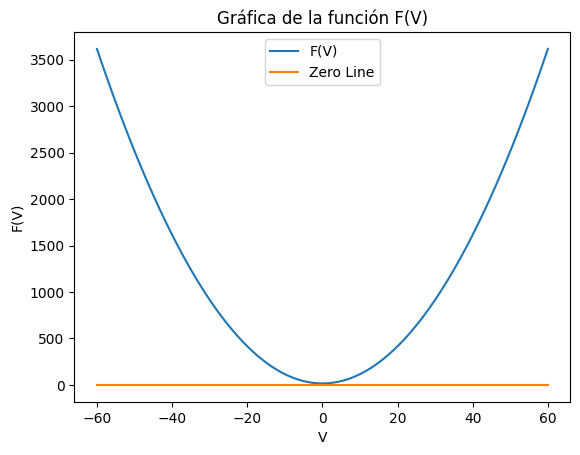

[  101880.67489341   125677.80089341   152566.34338722   182746.9339126
   216437.51748671   253874.52902399   295314.08893419   341033.20338039
   391330.95083974   446529.63216113   506975.85620947   573041.52739119
   645124.69485556   723650.21596916   809070.17881124   901864.02002253
  1002538.26550612  1111625.81244116  1229684.66213092  1357296.00476637
  1495061.54976102  1643599.98953991  1803542.48131717  1975527.03137189
  2160191.67065076  2358166.32030154  2570063.2621407   2796466.15323529
  3037917.55679484  3294905.0042758   3567845.656513    3857069.69483381
  4162802.64584801  4485146.92449733  4824062.96659256  5179350.41101556
  5550629.87849124  5937325.97280184  6338652.19516024  6753598.50631262
  7180922.28689316  7619143.42823688  8066544.2281238   8521174.66556555
  8980863.48514607  9443235.33712865  9905734.00053897 10365651.47219317
 10820162.44773615 11266363.4661417  11701315.75305029 12122090.59699337
 12525815.94068395 12909722.77894085 13271189.933138

In [43]:
def FV2(I):
    FV2= I+V**2
    ##FV2 = I + (gC * (V - Ep) - gNaC * (V - ENap) * n )**2
    return FV2

plt.plot(V, FV2(16), label='F(V)')
plt.plot(V, np.zeros(V.shape), label='Zero Line')
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()
plt.show()

print(FV(16))

Ahora vamos a hacer el modelo cuadratico:
Cuando I = 0

In [44]:

def FV2(I):
    FV2= I+V**2
    #V2 = (gC * (V - Ep) - gNaC * (V - ENap) * nNa)**2
    return FV2

print(FV2(0))


[3.60000000e+03 3.45601469e+03 3.31496786e+03 3.17685950e+03
 3.04168962e+03 2.90945822e+03 2.78016529e+03 2.65381084e+03
 2.53039486e+03 2.40991736e+03 2.29237833e+03 2.17777778e+03
 2.06611570e+03 1.95739210e+03 1.85160698e+03 1.74876033e+03
 1.64885216e+03 1.55188246e+03 1.45785124e+03 1.36675849e+03
 1.27860422e+03 1.19338843e+03 1.11111111e+03 1.03177227e+03
 9.55371901e+02 8.81910009e+02 8.11386593e+02 7.43801653e+02
 6.79155188e+02 6.17447199e+02 5.58677686e+02 5.02846648e+02
 4.49954086e+02 4.00000000e+02 3.52984389e+02 3.08907254e+02
 2.67768595e+02 2.29568411e+02 1.94306703e+02 1.61983471e+02
 1.32598714e+02 1.06152433e+02 8.26446281e+01 6.20752984e+01
 4.44444444e+01 2.97520661e+01 1.79981635e+01 9.18273646e+00
 3.30578512e+00 3.67309458e-01 3.67309458e-01 3.30578512e+00
 9.18273646e+00 1.79981635e+01 2.97520661e+01 4.44444444e+01
 6.20752984e+01 8.26446281e+01 1.06152433e+02 1.32598714e+02
 1.61983471e+02 1.94306703e+02 2.29568411e+02 2.67768595e+02
 3.08907254e+02 3.529843

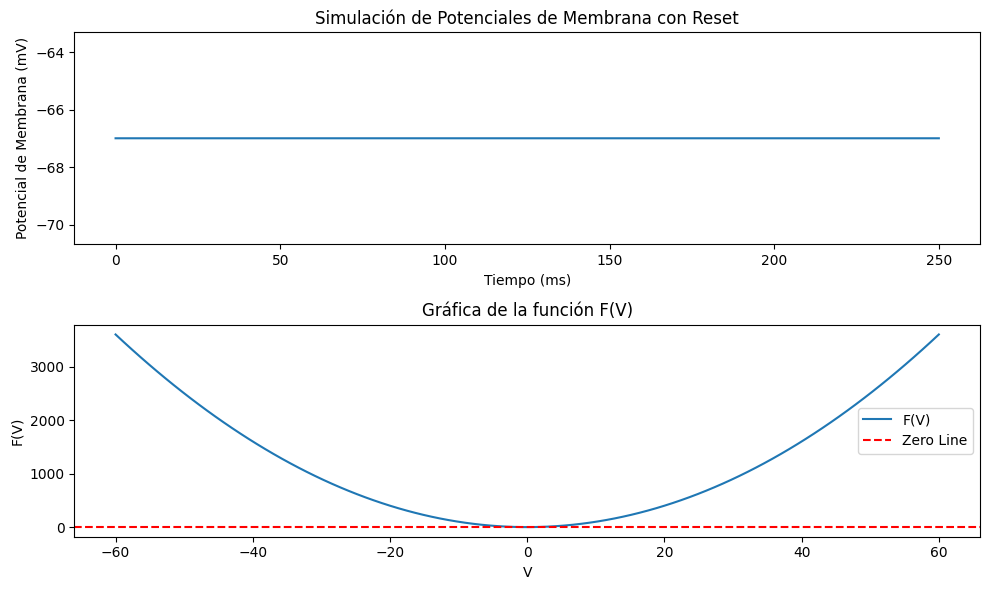

In [19]:

cap = 10  # Capacitancia
gC = 19  # Conductancia
gNaC = 74  # Conductancia de Na
Ep = -67  # Potencial de equilibrio de membrana
ENap = 60  # Potencial de equilibrio de Na
V12 = 1.5  # Voltaje medio de apertura del canal de Na
k = 16  # Delta voltaje para apertura del canal de Na

V = np.linspace(-60, 60, 100)

n = 1 / (1 + np.exp((V12 - V) / k))


def FV2(I):
    FV2 = I + V**2
    #V2 = (gC * (V - Ep) - gNaC * (V - ENap) * nNa)**2
    return FV2


# Simulación del potencial de membrana
I = 0  # Corriente de entrada
V_reset = -50.0  # Valor de reset del potencial de membrana
dt = 0.1  # Tamaño del paso de tiempo
num_steps = 500  # Número de pasos de tiempo por potencial de membrana

time = np.arange(0, num_steps * 5 * dt, dt)  # Arreglo de tiempo
V_membrane = np.concatenate([membrane_potential(I, cap, gC, Ep, V_reset, dt, num_steps) for _ in range(5)])

# Gráfica del potencial de membrana y F(V)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_membrane)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación de Potenciales de Membrana con Reset')

plt.subplot(2, 1, 2)
plt.plot(V, FV2(0), label='F(V)')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')  # Línea cero en y
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()

plt.tight_layout()
plt.show()



Hacemos lo mismo pero ahora para cuando I>0 o sea = 2

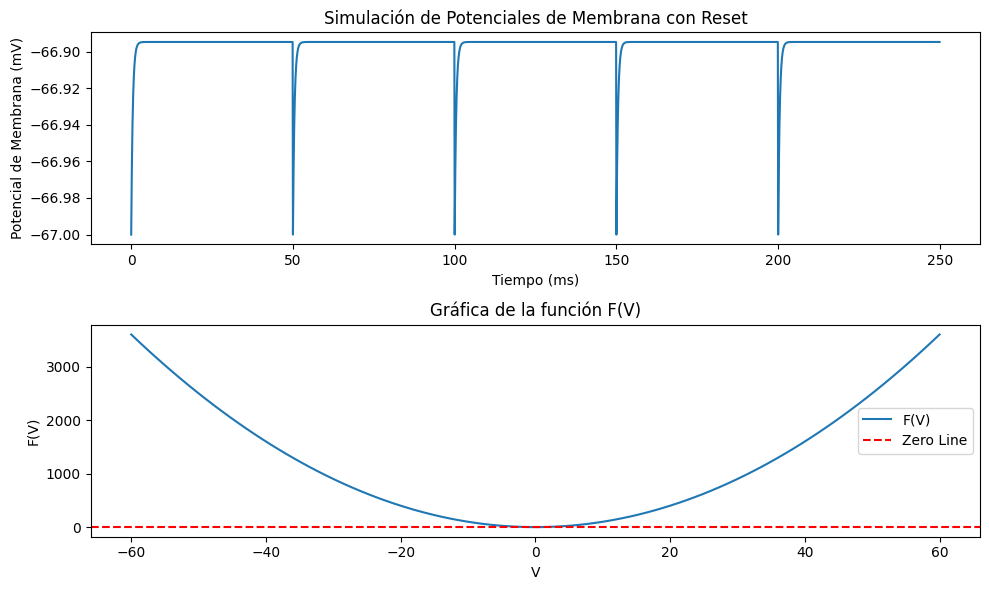

In [20]:


# Simulación del potencial de membrana
I = 2  # Corriente de entrada
V_reset = -50.0  # Valor de reset del potencial de membrana
dt = 0.1  # Tamaño del paso de tiempo
num_steps = 500  # Número de pasos de tiempo por potencial de membrana

time = np.arange(0, num_steps * 5 * dt, dt)  # Arreglo de tiempo
V_membrane = np.concatenate([membrane_potential(I, cap, gC, Ep, V_reset, dt, num_steps) for _ in range(5)])

# Gráfica del potencial de membrana y F(V)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_membrane)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación de Potenciales de Membrana con Reset')

plt.subplot(2, 1, 2)
plt.plot(V, FV2(0), label='F(V)')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')  # Línea cero en y
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()

plt.tight_layout()
plt.show()

Y ahora para cuando I=16


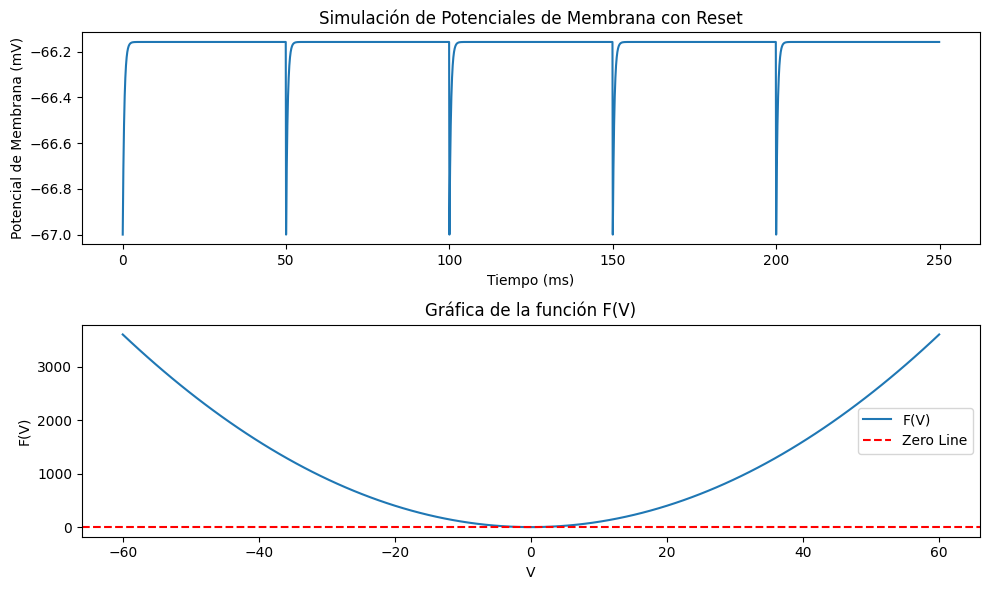

In [21]:

cap = 10  # Capacitancia
gC = 19  # Conductancia
gNaC = 74  # Conductancia de Na
Ep = -67  # Potencial de equilibrio de membrana
ENap = 60  # Potencial de equilibrio de Na
V12 = 1.5  # Voltaje medio de apertura del canal de Na
k = 16  # Delta voltaje para apertura del canal de Na

V = np.linspace(-60, 60, 100)

n = 1 / (1 + np.exp((V12 - V) / k))


def FV2(I):
    FV2 = I + V**2
    #V2 = (gC * (V - Ep) - gNaC * (V - ENap) * nNa)**2
    return FV2


# Simulación del potencial de membrana
I = 16 # Corriente de entrada
V_reset = -50.0  # Valor de reset del potencial de membrana
dt = 0.1  # Tamaño del paso de tiempo
num_steps = 500  # Número de pasos de tiempo por potencial de membrana

time = np.arange(0, num_steps * 5 * dt, dt)  # Arreglo de tiempo
V_membrane = np.concatenate([membrane_potential(I, cap, gC, Ep, V_reset, dt, num_steps) for _ in range(5)])

# Gráfica del potencial de membrana y F(V)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_membrane)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación de Potenciales de Membrana con Reset')

plt.subplot(2, 1, 2)
plt.plot(V, FV2(0), label='F(V)')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')  # Línea cero en y
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()

plt.tight_layout()
plt.show()

Hacemos lo mismo para cuando I<0 = -100

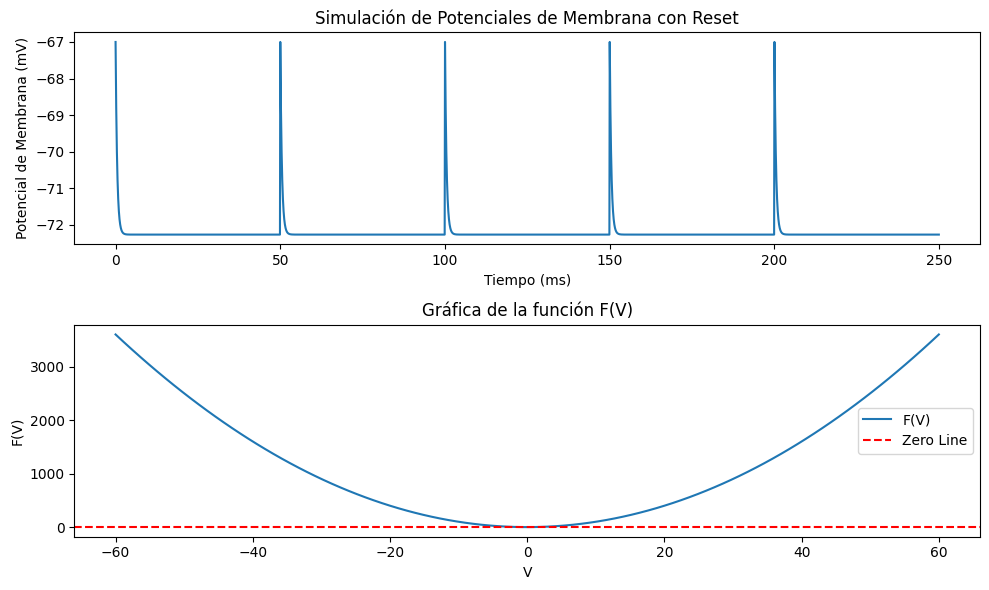

In [22]:

cap = 10  # Capacitancia
gC = 19  # Conductancia
gNaC = 74  # Conductancia de Na
Ep = -67  # Potencial de equilibrio de membrana
ENap = 60  # Potencial de equilibrio de Na
V12 = 1.5  # Voltaje medio de apertura del canal de Na
k = 16  # Delta voltaje para apertura del canal de Na

V = np.linspace(-60, 60, 100)

n = 1 / (1 + np.exp((V12 - V) / k))


def FV2(I):
    FV2 = I + V**2
    #V2 = (gC * (V - Ep) - gNaC * (V - ENap) * nNa)**2
    return FV2


# Simulación del potencial de membrana
I = -100 # Corriente de entrada
V_reset = -50.0  # Valor de reset del potencial de membrana
dt = 0.1  # Tamaño del paso de tiempo
num_steps = 500  # Número de pasos de tiempo por potencial de membrana

time = np.arange(0, num_steps * 5 * dt, dt)  # Arreglo de tiempo
V_membrane = np.concatenate([membrane_potential(I, cap, gC, Ep, V_reset, dt, num_steps) for _ in range(5)])

# Gráfica del potencial de membrana y F(V)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V_membrane)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Simulación de Potenciales de Membrana con Reset')

plt.subplot(2, 1, 2)
plt.plot(V, FV2(0), label='F(V)')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')  # Línea cero en y
plt.xlabel('V')
plt.ylabel('F(V)')
plt.title('Gráfica de la función F(V)')
plt.legend()

plt.tight_layout()
plt.show()

Si hacemos zoom podemos ver el dezplazamiento de los potenciales que se puede apreciar mejor en la grafica 1